In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import math
import matplotlib.pyplot as plt
df_Train=pd.read_csv('C:/Users/DELL/Documents/Data_Train.csv')
df_Test=pd.read_csv('C:/Users/DELL/Documents/Test_set.csv')

In [2]:
df_Train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [3]:
df_Test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [4]:
df_Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_Train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df_Train.shape

(10683, 11)

In [7]:
df_Train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df_Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_Train["Route"].unique()

array(['BLR ? DEL', 'CCU ? IXR ? BBI ? BLR', 'DEL ? LKO ? BOM ? COK',
       'CCU ? NAG ? BLR', 'BLR ? NAG ? DEL', 'CCU ? BLR',
       'BLR ? BOM ? DEL', 'DEL ? BOM ? COK', 'DEL ? BLR ? COK',
       'MAA ? CCU', 'CCU ? BOM ? BLR', 'DEL ? AMD ? BOM ? COK',
       'DEL ? PNQ ? COK', 'DEL ? CCU ? BOM ? COK', 'BLR ? COK ? DEL',
       'DEL ? IDR ? BOM ? COK', 'DEL ? LKO ? COK',
       'CCU ? GAU ? DEL ? BLR', 'DEL ? NAG ? BOM ? COK',
       'CCU ? MAA ? BLR', 'DEL ? HYD ? COK', 'CCU ? HYD ? BLR',
       'DEL ? COK', 'CCU ? DEL ? BLR', 'BLR ? BOM ? AMD ? DEL',
       'BOM ? DEL ? HYD', 'DEL ? MAA ? COK', 'BOM ? HYD',
       'DEL ? BHO ? BOM ? COK', 'DEL ? JAI ? BOM ? COK',
       'DEL ? ATQ ? BOM ? COK', 'DEL ? JDH ? BOM ? COK',
       'CCU ? BBI ? BOM ? BLR', 'BLR ? MAA ? DEL',
       'DEL ? GOI ? BOM ? COK', 'DEL ? BDQ ? BOM ? COK',
       'CCU ? JAI ? BOM ? BLR', 'CCU ? BBI ? BLR', 'BLR ? HYD ? DEL',
       'DEL ? TRV ? COK', 'CCU ? IXR ? DEL ? BLR',
       'DEL ? IXU ? BOM ? COK', 'CCU 

In [10]:
df_Train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
df_Train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df_Train["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [13]:
df_Train["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

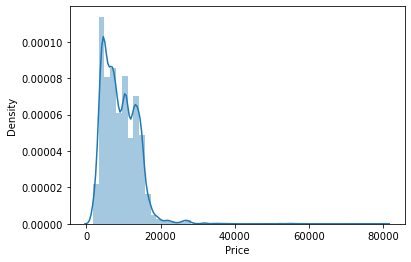

In [14]:
sns.distplot(df_Train["Price"])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

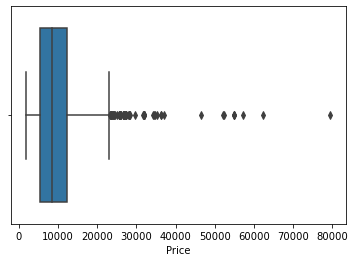

In [15]:
sns.boxplot(df_Train["Price"])

No outliers needs be treated in this case as the only numeric column is Target variable Price

In [16]:
df_Train.skew()

Price    1.812552
dtype: float64

skewness is only in the Price column which is Target column so no need to be treated

# Missing Values imputation

In [17]:
df_Train["Route"]=df_Train["Route"].fillna(df_Train["Route"].mode()[0])

In [18]:
df_Train["Total_Stops"]=df_Train["Total_Stops"].fillna(df_Train["Total_Stops"].mode()[0])

In [19]:
df_Train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df_Train.columns:
    if df_Train[i].dtypes=="object":
        df_Train[i]=enc.fit_transform(df_Train[i].values.reshape(-1,1))


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
df_Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,4107
10679,1,29,3,0,64,193,1305,237,4,8,4145
10680,4,29,0,2,18,58,824,280,4,8,7229
10681,10,0,0,5,18,92,938,238,4,8,12648


<AxesSubplot:>

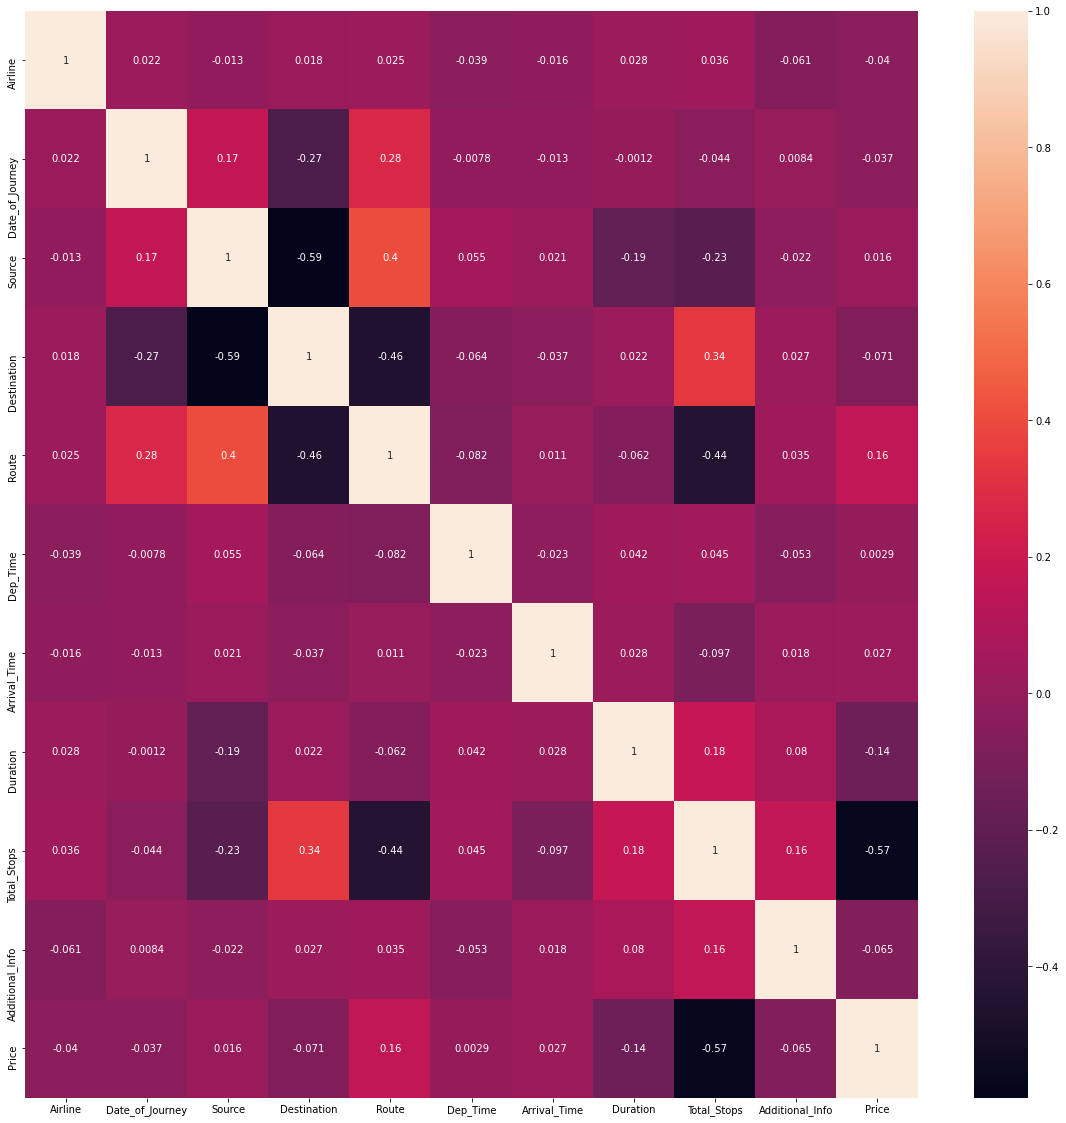

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df_Train.corr(),annot=True)

In [23]:
df=df_Train.drop(["Date_of_Journey"],axis=1)

# Splitting Data Frame

In [24]:
x=df.iloc[:,0:9]
y=df.iloc[:,-1]
x

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,0,5,18,211,233,240,4,8
1,1,3,0,84,31,906,336,1,8
2,4,2,1,118,70,413,106,1,8
3,3,3,0,91,164,1324,311,0,8
4,3,0,5,29,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,183,1259,236,4,8
10679,1,3,0,64,193,1305,237,4,8
10680,4,0,2,18,58,824,280,4,8
10681,10,0,5,18,92,938,238,4,8


# Scaling Data

In [25]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

# Linear Regression 

In [26]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test=LR.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.35522007880766227
At random state 0,the testing accuracy is:- 0.3491457697446664


At random state 1,the training accuracy is:- 0.3570016352908436
At random state 1,the testing accuracy is:- 0.3427627500201058


At random state 2,the training accuracy is:- 0.3479933750135761
At random state 2,the testing accuracy is:- 0.38026909233599726


At random state 3,the training accuracy is:- 0.35688647261760187
At random state 3,the testing accuracy is:- 0.3426356531702669


At random state 4,the training accuracy is:- 0.34800630603898985
At random state 4,the testing accuracy is:- 0.380846475394334


At random state 5,the training accuracy is:- 0.353755008998367
At random state 5,the testing accuracy is:- 0.355529209896872


At random state 6,the training accuracy is:- 0.3559567481563186
At random state 6,the testing accuracy is:- 0.34620305405550833


At random state 7,the training accuracy is:- 0.3521946741703956
At random state 7,the testing a

At random state 97,the training accuracy is:- 0.35203711407421123
At random state 97,the testing accuracy is:- 0.3618339856408048


At random state 98,the training accuracy is:- 0.3504876515418114
At random state 98,the testing accuracy is:- 0.37103749369462335


At random state 99,the training accuracy is:- 0.34870911617331046
At random state 99,the testing accuracy is:- 0.3780541521101737




random sate =84


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=84)

In [28]:
LR.fit(x_train,y_train)
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.3544883769806415


In [29]:
Accuracy_Train=r2_score(y_train,pred_train)
Accuracy_Test=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,x,y,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.3526795176772803 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 3 the cv score is 0.3525653302598715 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 4 the cv score is 0.3526656056789479 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 5 the cv score is 0.3524069524252052 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 6 the cv score is 0.35275652469654584 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 7 the cv score is 0.3530985445395168 and accuracy score for training is -0.3393830903347701 and accuracy for the testing is 0.3544883769806415


At cross fold 8 the cv score is 0.35291233106

CV=9 can be chosen

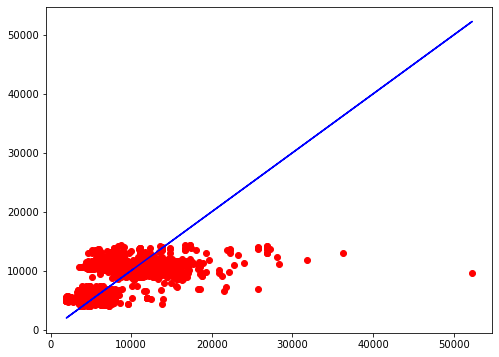

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')

# Lasso

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':[84],'selection':["cyclic","random"],'precompute':[True,False]}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 0.0001, 'precompute': True, 'random_state': 84, 'selection': 'random'}


In [32]:
Las = Lasso(alpha=0.0001,random_state=84,precompute=True,selection="random")
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

0.354488379833395

In [33]:
cvscore=cross_val_score(Las,x,y,cv=9)
cvmean=cvscore.mean()
cvmean

0.3537675425264926

# Random Forest

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"],'random_state':[84],'bootstrap':[True,False]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)
print(FitParameters.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'sqrt', 'random_state': 84}


In [35]:
rf= RandomForestRegressor(criterion="mae",max_features="sqrt",random_state=84,bootstrap=True)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=9)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 77.29701982398531
Cross Val Score: 75.07101049601765


# DTR

In [36]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae','poisson'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"],'random_state':[84]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto', 'random_state': 84, 'splitter': 'best'}


In [37]:
DTR = DecisionTreeRegressor(criterion='mae', splitter='best',random_state=84,max_features='auto')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=9)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 70.8395732788291
Cross Val Score: 65.28681864966697


# SVR

In [38]:
from sklearn.svm import LinearSVR
parameters = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'], 'random_state':[84],'fit_intercept':[True,False]}
SVR =LinearSVR()
clf = GridSearchCV(SVR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'random_state': 84}


In [39]:
SVR = LinearSVR(fit_intercept=True, loss='squared_epsilon_insensitive',random_state=84)
SVR.fit(x_train,y_train)
SVR.score(x_train,y_train)
pred_decision = SVR.predict(x_test)

SVRs = r2_score(y_test,pred_decision)
print('R2 Score:',SVRs*100)

SVRscore = cross_val_score(SVR,x_train,y_train,cv=9)
SVRc = SVRscore.mean() 
print('Cross Val Score:',SVRc*100)

R2 Score: 35.450003872813504
Cross Val Score: 35.731503340002725


From the above we can see that Random Forest is the best fit

# Test Data set- cleaning

In [41]:
df_Test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [43]:
df_Test.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU ? BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU ? BOM ? BLR,16:30,22:35,6h 5m,1 stop,No info


In [44]:
df_Test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
df_Test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

# Encoding 

In [46]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in df_Test.columns:
    if df_Test[i].dtypes=="object":
        df_Test[i]=enc.fit_transform(df_Test[i].values.reshape(-1,1))


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
df_Test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,39,3,0,51,170,617,150,0,5
2667,3,28,3,0,43,106,507,213,4,5
2668,4,36,2,1,76,183,151,278,0,5
2669,1,36,2,1,76,11,577,60,0,5


In [48]:
import pickle
filename = 'FPP.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [50]:
import numpy as np
a=np.array(y_test)
a

array([13538, 15554,  3625, ..., 11349, 12898, 10262], dtype=int64)

In [51]:
predicted=np.array(rf.predict(x_test))
predicted

array([12159.08 , 15335.555,  3072.965, ...,  6709.2  , 10478.24 ,
       10546.49 ])

In [52]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
conclusion

,original,predicted
0,13538,12159.080
1,15554,15335.555
2,3625,3072.965
3,7303,9285.830
4,3898,3932.445
...,...,...
2132,6961,6529.380
2133,6528,6512.710
2134,11349,6709.200
2135,12898,10478.240


In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(df_Test,method='yeo-johnson')

In [60]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)

In [61]:
df_Test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info'],
      dtype='object')

In [58]:
df_Test=df_Test.drop(["Date_of_Journey"],axis=1)

In [62]:
predict_Data_test = rf.predict(x)

In [63]:
predict_Data_test

array([14771.62 ,  5158.535, 10219.01 , ..., 14563.01 ,  9895.65 ,
       14746.98 ])